# Exploring Dandiset 000945: Neural Spiking Data in Awake Rat Somatosensory Cortex

**Disclaimer:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset (000945) contains neural spiking data recorded from the somatosensory cortex of awake rats in response to transcranial focused ultrasound stimulation (tFUS). The data includes recordings from multiple rats and different pulse repetition frequencies (PRFs) of ultrasound stimulation.

## What this notebook covers

This notebook demonstrates how to load and visualize data from this Dandiset, focusing on spike times and cell type labels. We will load data from one of the NWB files in the Dandiset and generate plots to visualize spike times and their distributions.

## Required Packages

The following packages are required to run this notebook:
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

## Loading the Dandiset

First, we connect to the DANDI archive and load the Dandiset.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 75 assets in the dataset

First 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


## Loading Data from an NWB File

We will load data from the first NWB file in the Dandiset: `sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb`. This file contains neural spiking data recorded from rat BH497 on March 10, 2024.

In [3]:
url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now we can inspect the contents of the NWB file.

In [4]:
nwb.session_description # (str) Awake S1 Stimulation by tFUS
nwb.identifier # (str) BH498_3000_200_anes
nwb.session_start_time # (datetime) 2024-03-10T14:37:29-04:00
nwb.electrode_groups["shank1"] # (ElectrodeGroup)

shank1 pynwb.ecephys.ElectrodeGroup at 0x140278143024656
Fields:
  description: electrode group for shank1
  device: array pynwb.device.Device at 0x140278144526416
Fields:
  description: A1x32-Poly3-10mm-50-177-Z32
  manufacturer: Neuronexus

  location: brain area

We can also get information about the electrodes.

In [5]:
nwb.electrodes.colnames

('x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name')

## Visualizing Spike Times

Next, we will load the spike times for a subset of units and visualize them.

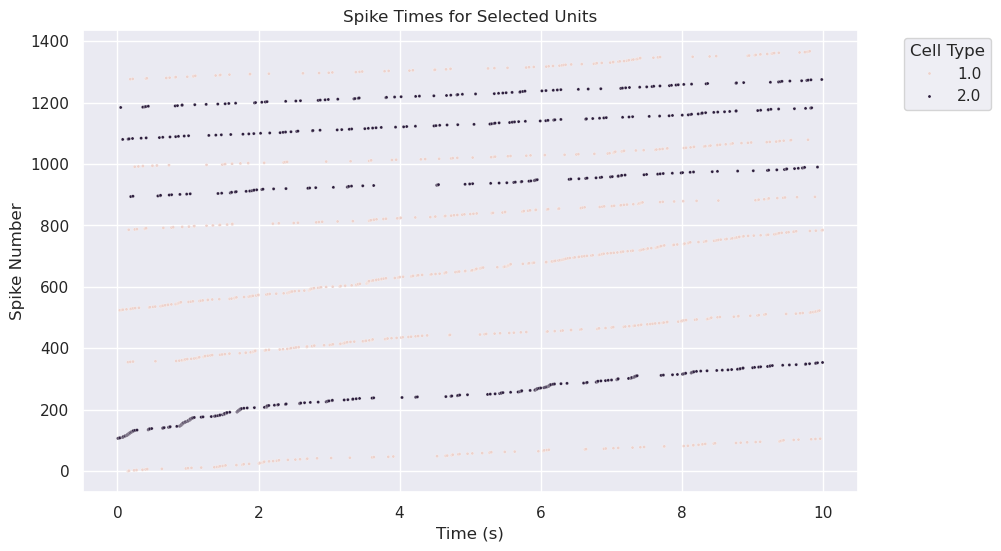

In [6]:
# Select a random subset of units (e.g., 10 units)
unit_ids = nwb.units.id[:]
np.random.shuffle(unit_ids)
selected_unit_ids = unit_ids[:10]

# Collect spike times and cell type labels for the selected units
spike_times = []
celltype_labels = []
for unit_id in selected_unit_ids:
    unit_index = np.where(nwb.units.id[:] == unit_id)[0][0]
    times = nwb.units['spike_times'][unit_index]
    # Limit spike times to the first 10 seconds
    times = times[times < 10]
    spike_times.extend(times)
    celltype_labels.extend([nwb.units['celltype_label'][unit_index]] * len(times))

# Plot spike times
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spike_times, y=np.arange(len(spike_times)), hue=celltype_labels, s=5)
plt.xlabel("Time (s)")
plt.ylabel("Spike Number")
plt.title("Spike Times for Selected Units")
plt.legend(title="Cell Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The plot above shows the spike times for the selected units, colored by cell type.

## Distribution of Spike Times

Now, we will plot the distribution of spike times for each cell type.

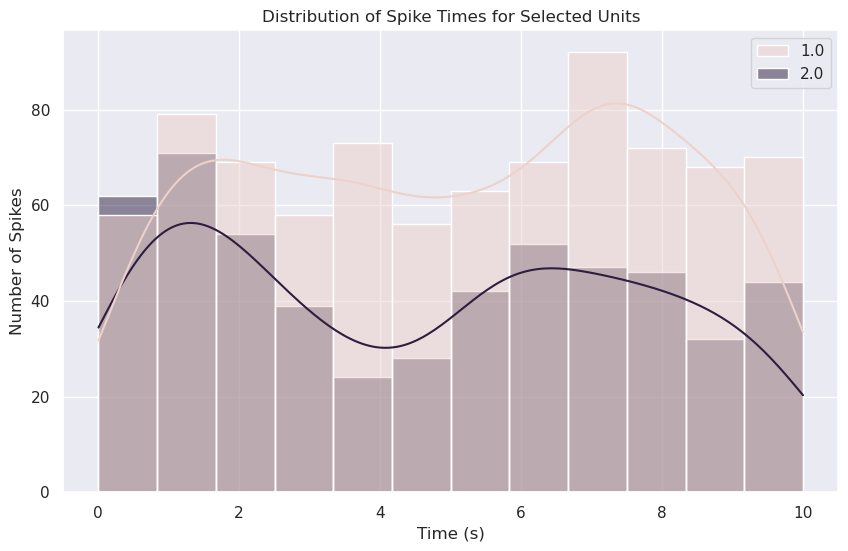

In [7]:
# Plot distribution of spike times
plt.figure(figsize=(10, 6))
sns.histplot(x=spike_times, hue=celltype_labels, kde=True)
plt.xlabel("Time (s)")
plt.ylabel("Number of Spikes")
plt.title("Distribution of Spike Times for Selected Units")
plt.show()

This histogram shows the distribution of spike times for the selected units.

## Summary and Future Directions

This notebook demonstrated how to load and visualize neural spiking data from Dandiset 000945. We loaded data from an NWB file, extracted spike times and cell type labels, and generated plots to visualize the data.

Future directions for analysis could include:
- Analyzing spike rates and firing patterns for different PRFs of ultrasound stimulation.
- Comparing neural activity between different subjects or experimental conditions.
- Performing more advanced signal processing techniques to extract features from the neural data.